# Analyzing NYC High School SAT Score

The SAT, Scholastic Aptitude Test, is a test that high scool senir in the U.S taken every year. 

The SAT has three sections, each of wich is worth a maximum of 800 points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Colleges use the SAT to determine which students to admit. High average SAT scores are usually indicative of a good school.

**In this project we are going to investigate the correlation between SAT scores in NYC high schools and various demographics such as race, gender and income.**

NYC has published data on [student SAT scores](#https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) by high school, along with additional demographic datasets.

Here are the links to all of the data sets we'll be using:
-[SAT scores by school](#https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) : SAT scores for each high scool in NYC

- [School attendance](#https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) : Attendance inforation for each school in NYC

- [Class size](#https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) : information on class size for each school

- [Ap test results](#https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) : Advances Placement exam results for each high scool

- [Graduation outcomes](#https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information

- [Demographics](#https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) : Demographic information for each school
- [School survey](#https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) : Surveys of parents, teachers and students at each school


All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.


New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair.

Before we move into coding we need to do some background research:
- Only high school students take the SAT, so we'll want to focus on high schools.
- New York City is made up of five boroughs, which are essentially distinct regions.
- New York City schools fall within several different school districts, each of which can contains dozens of schools.
- Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
- Each school in New York City has a unique code called a **DBN**, or district borough number.
- Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.


## 1 Read data

In [429]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


#Store all of the dataframes in a dictionary. 
#This will give us a convenient way to store them, and a quick way to reference them later on.
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

for i in data_files:
    file = pd.read_csv("schools/{0}".format(i)) # Recall that all of the data sets are in the schools folder. That means the path to ap_2010.csv is schools/ap_2010.csv.
    data[i.replace(".csv", "")] = file

print(data['ap_2010'].info())
data['ap_2010'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
DBN                                     258 non-null object
SchoolName                              258 non-null object
AP Test Takers                          258 non-null object
Total Exams Taken                       258 non-null object
Number of Exams with scores 3 4 or 5    258 non-null object
dtypes: object(5)
memory usage: 10.2+ KB
None


,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [430]:
print(data['class_size'].info())
data['class_size'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 16 columns):
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE        

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [431]:
print(data['demographics'].info())
data['demographics'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 38 columns):
DBN                  10075 non-null object
Name                 10075 non-null object
schoolyear           10075 non-null int64
fl_percent           8560 non-null object
frl_percent          4482 non-null float64
total_enrollment     10075 non-null int64
prek                 4712 non-null object
k                    5882 non-null object
grade1               5881 non-null object
grade2               5851 non-null object
grade3               5779 non-null object
grade4               5741 non-null object
grade5               5777 non-null object
grade6               4517 non-null object
grade7               4203 non-null object
grade8               4085 non-null object
grade9               3974 non-null object
grade10              3846 non-null object
grade11              3674 non-null object
grade12              3513 non-null object
ell_num              9885 non-null float64
ell_p

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [432]:
print(data['graduation'].info())
data['graduation'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25096 entries, 0 to 25095
Data columns (total 23 columns):
Demographic                           25096 non-null object
DBN                                   25096 non-null object
School Name                           25096 non-null object
Cohort                                25096 non-null object
Total Cohort                          25096 non-null int64
Total Grads - n                       25096 non-null object
Total Grads - % of cohort             25096 non-null object
Total Regents - n                     25096 non-null object
Total Regents - % of cohort           25096 non-null object
Total Regents - % of grads            25051 non-null object
Advanced Regents - n                  25096 non-null object
Advanced Regents - % of cohort        25096 non-null object
Advanced Regents - % of grads         25051 non-null object
Regents w/o Advanced - n              25096 non-null object
Regents w/o Advanced - % of cohort    25096 non-null

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [433]:
print(data['hs_directory'].info())
data['hs_directory'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 58 columns):
dbn                                 435 non-null object
school_name                         435 non-null object
boro                                435 non-null object
building_code                       435 non-null object
phone_number                        435 non-null object
fax_number                          423 non-null object
grade_span_min                      435 non-null object
grade_span_max                      435 non-null int64
expgrade_span_min                   33 non-null object
expgrade_span_max                   33 non-null float64
bus                                 434 non-null object
subway                              358 non-null object
primary_address_line_1              435 non-null object
city                                435 non-null object
state_code                          435 non-null object
zip                                 435 non-null int64
we

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106..."
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Districts 28 and 29 students or residents,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40..."


In [434]:
print(data['sat_results'].info())
data['sat_results'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB
None


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


### 1.1 Read survey .txt

In [435]:
# read txt filed with a special encoding and a delimiter
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')

survey = pd.concat([all_survey, d75_survey], axis=0) #Combine both data set 
survey["DBN"] = survey["dbn"] #rename column
print(survey.shape)
# survey has 2774 columns, we need to filter the columns to remove the ones we don't need
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
#survey = survey.loc[:,survey_fields]
survey = survey[survey_fields]
data["survey"] = survey #add survey dataset to the data dictionary created above
print(data["survey"].info())
data["survey"].head()

(1702, 2774)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 55
Data columns (total 23 columns):
DBN           1702 non-null object
rr_s          1041 non-null float64
rr_t          1702 non-null int64
rr_p          1702 non-null int64
N_s           1036 non-null float64
N_t           1700 non-null float64
N_p           1696 non-null float64
saf_p_11      1696 non-null float64
com_p_11      1696 non-null float64
eng_p_11      1696 non-null float64
aca_p_11      1696 non-null float64
saf_t_11      1700 non-null float64
com_t_11      1700 non-null float64
eng_t_11      1700 non-null float64
aca_t_11      1700 non-null float64
saf_s_11      1036 non-null float64
com_s_11      1036 non-null float64
eng_s_11      1036 non-null float64
aca_s_11      1036 non-null float64
saf_tot_11    1702 non-null float64
com_tot_11    1702 non-null float64
eng_tot_11    1702 non-null float64
aca_tot_11    1702 non-null float64
dtypes: float64(20), int64(2), object(1)
memory usage: 319.

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


To filter the columns we looked through a data dictionary at the [original data](#https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) download location. The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

The column names in survey refer to the following :


| Column |	Meaning |
| --- | --- |
| rr_s |	Student Response Rate |
| rr_t |	Teacher Response Rate |
| rr_p |	Parent Response Rate |
| N_s |	Number of student respondents |
| N_t |	Number of teacher respondents |
| N_p |	Number of parent respondents |
| nr_s |	Number of eligible students |
| nr_t |	Number of eligible teachers |
| nr_p |	Number of eligible parents |
| saf_p_10 |	Safety and Respect score based on parent responses |
| com_p_10 |	Communication score based on parent responses |
| eng_p_10 |	Engagement score based on parent responses |
| aca_p_10 |	Academic expectations score based on parent responses |
| saf_t_10 |	Safety and Respect score based on teacher responses |
| com_t_10 |	Communication score based on teacher responses |
| eng_t_10 |	Engagement score based on teacher responses |
| aca_t_10 |	Academic expectations score based on teacher responses |
| saf_s_10 |	Safety and Respect score based on student responses |
| com_s_10 |	Communication score based on student responses |
| eng_s_10 |	Engagement score based on student responses |
| aca_s_10 |	Academic expectations score based on student responses |
| saf_tot_10 |	Safety and Respect total score |
| com_tot_10 |	Communication total score |
| eng_tot_10 |	Engagement total score |
| aca_tot_10 |	Academic Expectations total score |

Now that all dataset are safely into the data dictionary we need to start preparing to combine the 7 data sets.

To combined all of them, we need to merge them through a key, means a unique column, present in all data set. DBN column is present in most of the data set except two of them. We need to create it. 

## 2. Clean data sets

### 2.1 Add DBN columns

When we explored all of the data sets, we noticed that some of them, like **class_size and hs_directory**, don't have a **DBN** column. 

1. hs_directory does have a dbn column, though, so we can just rename it.
2. However, class_size doesn't appear to have the column at all. 
    - it appreas that DBN is egual to the combined of CSD and SCHOOL CODE columns except that CSD can have only one digit. We need to add a 0 before the digit if CSD has only one digit by adding a new column. To do that we used a function to 
        - take the number of CSD columns
        - convert the number to a string
        - check the len()
        - if < 2 add a zero, else return the string

In [436]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"] #rename the DBN columns 

In [437]:
# Create a function to apply to data["class_size"]["CSD"]
def pad_csd(num):
    string_representation = str(num) #convert to string
    if len(string_representation) > 1: # determine the len 
        return string_representation  # len > 1 return the string
    else:
        return "0" + string_representation #len = 1 add a zero 
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd) # create a new column
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"] # combined both column to create DBN column
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


### 2.2 Convert columns to numeric

Before combining data set, we need to calculate variables that will be useful in our analysis such as a column that totals up the SAT scores for the different sections of the exam.

Before we can generate this column, we'll need to convert the SAT **Math Avg. Score**, **SAT Critical Reading Avg. Score**, and **SAT Writing Avg**. Score columns in the sat_results data set from the object (string) data type to a numeric data type.

It's important to pass the keyword argument errors="coerce" when we call pandas.to_numeric(), so that pandas treats any invalid strings it can't convert to numbers as missing values instead.

In [438]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score'] #columns to convert
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

# Create a new column to add the score for each discipline 
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

 We'll want to parse the latitude and longitude coordinates for each school.

In [439]:
data["hs_directory"]["Location 1"].head()

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
3    411 Pearl Street\nNew York, NY 10038\n(40.7106...
4    160-20 Goethals Avenue\nJamaica, NY 11432\n(40...
Name: Location 1, dtype: object

In [440]:
#  Extract the longitude and latitude, which are in parentheses at the end of the field.
# use a regular expression to extract them 
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon
# Create new columns 
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)
# Convert to numeric with the argument coerce so that pandas treats any invalid strings it can't convert to numbers as missing values instead.
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

### 2.3 Condense datasets

There are not unique DBN in class_size data set, as demographics and graduation data sets. A single rows in the sat_results dataset may match multiple rows in the class_size data set for example. 
We need to clean these datasets.

** To resilve this issus, we will condense the class_size, graduation and demographics data set so thtat each DBN is unique**

- **class _size**. We are dealing with high schools, we are only concerned with grades 9-12, that means we only pick rows where the value in GRADE column is 09-12. Each school have multiple program types. GEN ED is the largest category we will select rows where PROGRAM TYPE is GEN ED. 

- **demographics**. We are dealing with data in 2011-2012. Means we want to select only rows where schoolyear is 20112012.  This will give us the most recent year of data and also match our SAT results data.

- **graduation**. Cohort columns refers to the years. We want to pick the the most recent data available which is 2006, so we will pick Cohort == 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort

In [441]:
data["class_size"]["GRADE "].value_counts(dropna = False)

09-12      10644
MS Core     4762
NaN         1484
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: GRADE , dtype: int64

In [442]:
data["class_size"]["PROGRAM TYPE"].value_counts(dropna = False)

GEN ED     14545
CTT         7460
SPEC ED     3653
NaN         1484
G&T          469
Name: PROGRAM TYPE, dtype: int64

In [443]:
# Filter GRADE == 09-12 & program == GEN ED
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

This does not give us an unique DBN value. CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) seem to pertain to different kinds of classes. What we can do is take the average across all of the classes a school offers.

In [444]:
# Groupby method will split a dataframe up into unique groups, based on a given column. Then we aggregate by the mean
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

In [445]:
data["demographics"]["schoolyear"].value_counts(dropna = False)

20112012    1509
20102011    1498
20092010    1475
20082009    1441
20072008    1410
20062007    1386
20052006    1356
Name: schoolyear, dtype: int64

In [446]:
#Filter schoolyear == 20112012
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

In [447]:
data["graduation"]["Cohort"].value_counts(dropna = False)

2006 Aug    4131
2006        4130
2005        3963
2004        3708
2003        3432
2002        3095
2001        2637
Name: Cohort, dtype: int64

In [448]:
data["graduation"]["Demographic"].value_counts(dropna = False)

Total Cohort                   2493
General Education Students     2471
Special Education Students     2471
English Proficient Students    2471
Male                           2412
Black                          2403
Female                         2397
Hispanic                       2385
English Language Learners      2036
Asian                          1780
White                          1777
Name: Demographic, dtype: int64

In [449]:
# Filter Cohort == 2006 and Demographics == Total cohort
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

### 2.4 Convert AP scores to numeric

The only remaining thing to do is convert the Advanced Placement (AP) test scores from strings to numeric values. 

High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit. AP exams have a 1 to 5 scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

**It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools.**

To analyze this we need to convert some columns in ap_2010 dF. 

In [450]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

## 3. Combine the datasets

We need to determine which merge we will do (left, right, inner, outer).

There may be DBN values that exist in one data set but not in another. This is partly because the data is from different years. Because this project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from sat_results while minimizing null values. This means that we may need to use different merge strategies with different data sets. 

-  Some of the data sets have a lot of missing DBN values. This makes a left join more appropriate
-  Some data sets have DBN values that are almost identical to those in sat_results. This make a inner join more appropriate

In [451]:
combined = data["sat_results"]
# Merge data with left 
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

#Merge data with inner
to_merge = ["class_size", "demographics", "survey", "hs_directory"]
for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")
    
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


These merges appear to create many missing value, we need to deal with them.
- delete row with missing value ==> this is not a good idea, beacause we defined to do left join in order to not delete to many row
- Filled missing value with pandas.DataFrame.fillna() method ==> This method will replace any missing values in a dataframe with the values we specify. We will filled missing value with the mean 

In [452]:
# Fill missing value in combined DF 
combined = combined.fillna(combined.mean()) #with the mean
combined = combined.fillna(0) #with zero for any remaining missing values

In [453]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Columns: 159 entries, DBN to lon
dtypes: float64(51), int64(16), object(92)
memory usage: 453.8+ KB


In [454]:
combined.describe(include = 'all')

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
count,363,363,363,363.000000,363.000000,363.000000,363.000000,363.0,363.000000,363.000000,...,363.0,363.0,363.0,363.0,363.0,363.0,363.0,363,363.000000,363.000000
unique,362,362,159,NaN,NaN,NaN,NaN,229.0,NaN,NaN,...,23.0,7.0,4.0,2.0,NaN,NaN,NaN,233,NaN,NaN
top,04M610,YOUNG WOMEN'S LEADERSHIP SCHOOL,s,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,"800 East Gun Hill Road\nBronx, NY 10467\n(40.8...",NaN,NaN
freq,2,2,28,NaN,NaN,NaN,NaN,135.0,NaN,NaN,...,245.0,334.0,351.0,361.0,NaN,NaN,NaN,6,NaN,NaN
mean,NaN,NaN,NaN,404.119403,419.656716,399.662687,1223.438806,NaN,129.028846,197.038462,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,40.743533,-73.925345
std,NaN,NaN,NaN,57.486468,64.804541,59.187101,178.223775,NaN,175.816044,310.125423,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.081881,0.071633
min,NaN,NaN,NaN,279.000000,312.000000,286.000000,887.000000,NaN,6.000000,6.000000,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,40.528229,-74.192154
25%,NaN,NaN,NaN,371.000000,378.000000,365.000000,1113.000000,NaN,42.000000,56.000000,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,40.687143,-73.979256
50%,NaN,NaN,NaN,397.000000,408.000000,390.000000,1193.000000,NaN,129.028846,197.038462,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,40.741205,-73.929154
75%,NaN,NaN,NaN,417.500000,439.000000,411.500000,1266.500000,NaN,129.028846,197.038462,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,40.819472,-73.890124


### 3.1 Add a school district column for mapping

Mapping the statistics out on a school district level might be an interesting way to analyze them. 

Remember that there are 5 district in NYC. 

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.

Adding a column to the data set that specifies the school district will help us accomplish this.

In [455]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

## 4. Correlations

In this mission, we'll discover correlations, create plots, and then make maps. The first thing we'll do is find any correlations between any of the columns and sat_score. This will help us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and make maps using the columns we've identified.

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation.

In [456]:
# Find correlation
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

The result cannot be read, we need to investigate deeper the correlation.

### 4.1 Investigate the correlations bewteen the survey and the SAT score in each district

In [457]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041,01
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673,01
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426,01


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


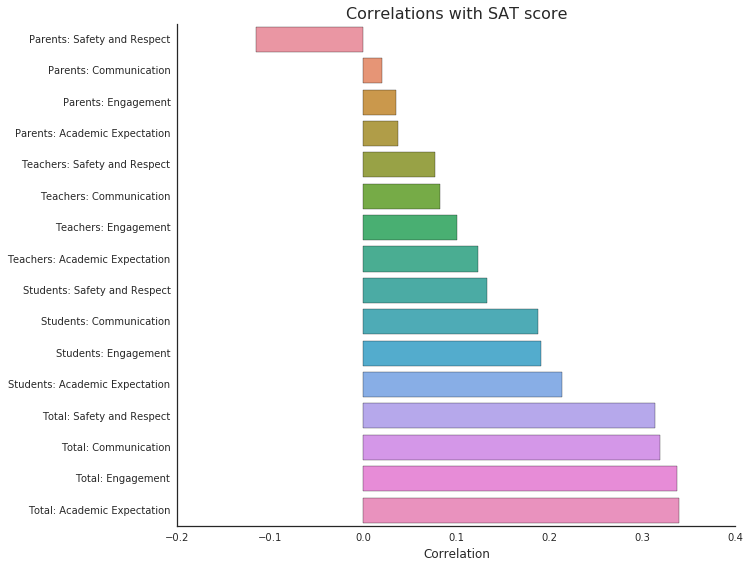

In [458]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.

# survey_fields.remove("DBN")
#use only data relevant 
survey = combined[['saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']]
corr =[] #initialisation 
for col in survey:
    c = combined["sat_score"].corr(survey[col])
    corr.append(c)
survey_rename = survey
#Rename to better understand the graph
survey_rename = survey_rename.rename({'saf_p_11' : 'Parents: Safety and Respect'}, axis=1)
survey_rename = survey_rename.rename({'com_p_11' : 'Parents: Communication'}, axis=1)
survey_rename = survey_rename.rename({'eng_p_11' : 'Parents: Engagement'}, axis=1)
survey_rename = survey_rename.rename({'aca_p_11' : 'Parents: Academic Expectation'}, axis=1)
survey_rename = survey_rename.rename({'saf_t_11' : 'Teachers: Safety and Respect'}, axis=1)
survey_rename = survey_rename.rename({'com_t_11' : 'Teachers: Communication'}, axis=1)
survey_rename = survey_rename.rename({'eng_t_11' : 'Teachers: Engagement'}, axis=1)
survey_rename = survey_rename.rename({'aca_t_11' : 'Teachers: Academic Expectation'}, axis=1)
survey_rename = survey_rename.rename({'saf_s_11' : 'Students: Safety and Respect'}, axis=1)
survey_rename = survey_rename.rename({'com_s_11' : 'Students: Communication'}, axis=1)
survey_rename = survey_rename.rename({'eng_s_11' : 'Students: Engagement'}, axis=1)
survey_rename = survey_rename.rename({'aca_s_11' : 'Students: Academic Expectation'}, axis=1)
survey_rename = survey_rename.rename({'saf_tot_11' : 'Total: Safety and Respect'}, axis=1)
survey_rename = survey_rename.rename({'com_tot_11' : 'Total: Communication'}, axis=1)
survey_rename = survey_rename.rename({'eng_tot_11' : 'Total: Engagement'}, axis=1)
survey_rename = survey_rename.rename({'aca_tot_11' : 'Total: Academic Expectation'}, axis=1)

#Plot to analyse data
plt.figure(figsize = (10,9))
sns.set_style("white")
sns.barplot(x = sorted(corr), y = survey_rename.columns)
sns.despine(top = True, right = True)
plt.title('Correlations with SAT score', fontsize = 16)
plt.xlabel("Correlation", fontsize = 12)

According to the graph above we can say : 
- There are a strong correlation between sat_score and :
    - Total Communication, engagement and academic expectation
    - Students Communication, engagement and academic expectation
- There is a negative correlation between sat_score and : 
    - Parents Safety and respect

We need to use scatterplot to investigate deeper the correlation. 


### 4.2 Analyze deeper : 
- 'saf_s_11' : 'Students: Safety and Respect
- 'saf_t_11' : 'Teachers: Safety and Respect'

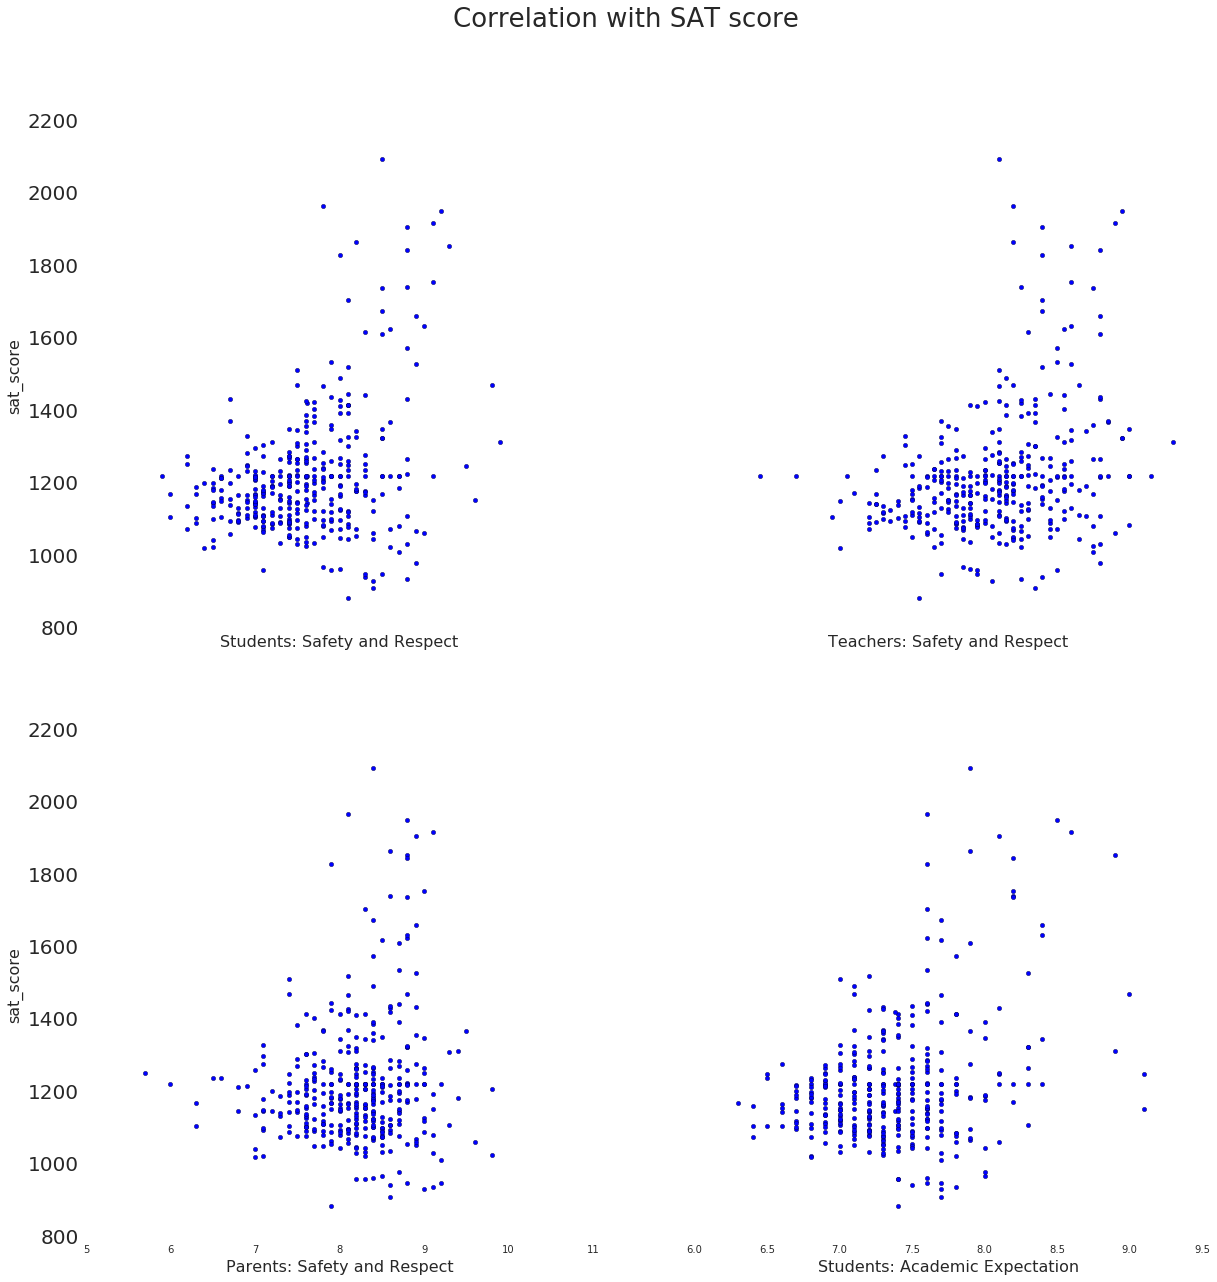

In [459]:
rename_survey = survey_rename[['Students: Safety and Respect','Teachers: Safety and Respect','Parents: Safety and Respect','Students: Academic Expectation']]
# plot with scatter plot to defined or not a correlation
fig = plt.figure(figsize=(20,20))
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.label_outer()
    ax.set_axis_bgcolor("white")
    ax.tick_params(bottom="off", top="off", left="off", right="off") #remove all the tick mark
    #ax.set_title('Correlation with SAT score', fontsize = 16)
    #ax.set_yticklabels(fontsize = 20)
    plt.yticks(fontsize=20)
    ax.set_xlabel(rename_survey.columns[i], fontsize = 16)
    if i == 0:
        ax.scatter(survey_rename['Students: Safety and Respect'],combined['sat_score'])
        ax.set_ylabel('sat_score', fontsize = 16)
    elif i == 1:
        ax.scatter(survey_rename['Teachers: Safety and Respect'],combined['sat_score'])
    elif i == 2:
        ax.scatter(survey_rename['Parents: Safety and Respect'],combined['sat_score'])
        ax.set_ylabel('sat_score', fontsize = 16)
    else:
        ax.scatter(survey_rename['Students: Academic Expectation'],combined['sat_score'])
fig.suptitle('Correlation with SAT score', fontsize = 26)

plt.show()

Through this graph, we cannot draw a line, this means that there are no schools with high sat_scores and low safety and respect scores but there are a good number of schools with high sat scores and high safety and respect scores.

### 4.3 Borough correlations 

We will dig into this relationship a bit more and try to figure out which schools have low safety scores. We will compute the average safety score for each borough. 

In [460]:
# Compute the average safety score for each borough
combined["boro"]# each district

# need to groupby and then apply a aggregation with mean
combined_boro = combined[["saf_s_11","saf_t_11",'saf_p_11','saf_tot_11']].groupby(by=combined['boro']).agg(np.mean)
combined_boro = combined_boro.reset_index()
average_safety_tot = round(combined["saf_tot_11"].mean(),2)

combined_boro_sat = combined["sat_score"].groupby(by = combined['boro']).agg(np.mean).reset_index()
average_sat_score_tot = round(combined["sat_score"].mean(),2) #calcul the total average

print('max:' ,combined_boro.max())
print("average sat score: ", average_sat_score_tot)
print("average safety tot: ", average_safety_tot)
print(combined_boro)
combined_boro_sat

max: boro          Staten Island
saf_s_11            6.83137
saf_t_11            7.36562
saf_p_11            8.34624
saf_tot_11          7.47333
dtype: object
average sat score:  1223.44
average safety tot:  7.31
            boro  saf_s_11  saf_t_11  saf_p_11  saf_tot_11
0          Bronx  6.606577  7.026882  8.346237    7.322581
1       Brooklyn  6.370755  6.985849  8.036792    7.129245
2      Manhattan  6.831370  7.287778  8.288889    7.473333
3         Queens  6.721875  7.365625  8.098437    7.387500
4  Staten Island  6.530000  7.210000  7.800000    7.200000


,boro,sat_score
0,Bronx,1157.598203
1,Brooklyn,1181.364461
2,Manhattan,1278.331410
3,Queens,1286.753032
4,Staten Island,1382.500000


In [461]:
# Filter high safety > 7 and respect scores and high sat scores > 1800
high_safety_high_sat = combined[(combined["saf_tot_11"] > 7) & (combined["sat_score"] > 1800) ]
high_safety_high_sat["boro"].value_counts()

Manhattan        3
Bronx            2
Queens           2
Staten Island    1
Brooklyn         1
Name: boro, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


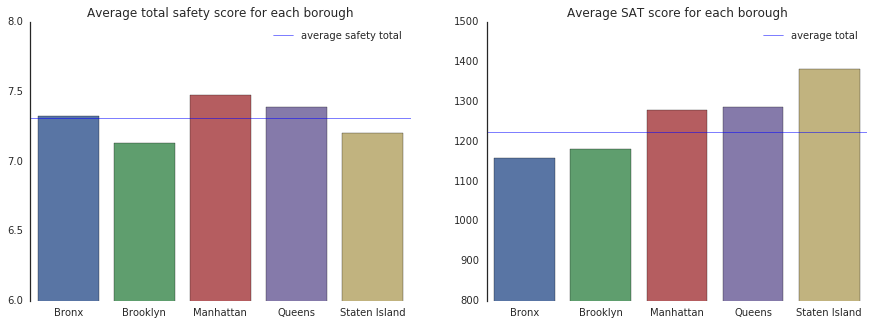

In [462]:
# Plot the safety score & SAT score for each borough 

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
sns.set_style("white")
sns.despine(top = True, right = True, bottom = True)
ax1 = sns.barplot(ax = ax1, x = "boro", y = 'saf_tot_11', data = combined_boro)
ax1.set_title('Average total safety score for each borough')
ax1.axhline(average_safety_tot, linewidth=0.5, label = "average safety total")
ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_ylim(6,8)

ax2 = sns.barplot(ax = ax2, x = "boro", y ="sat_score", data = combined_boro_sat)
ax2.set_title('Average SAT score for each borough')
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.axhline(average_sat_score_tot, linewidth=0.5, label = "average total")
ax2.legend()
ax2.set_ylim(800,1500)
plt.show()


All 5 boroughs are represented amongst the schools that scored highly for safety & respoecnt and also for SAT scores.

As we can see, in Brooklyn and Staten Island, the mean of safety in lower than the total average. The higher average for total safety is in Manhattan district. All district are not egal to the safety. 

The average of SAT score is lower in Bronx and Brooklyn than the total average of SAT score. However, Staten Island borough has the highest average of SAT score. 
So there are no correlation between total safety score and SAT score. 

### 4.4 Investigate the correlations bewteen the race and the SAT score in each district

In [463]:
#remember
white_per = combined[["white_per","sat_score"]]
asian_per = combined[["asian_per","sat_score"]]
black_per = combined[["black_per","sat_score"]]
hispanic_per = combined[["hispanic_per","sat_score"]]
ethnic = combined[["white_per","asian_per","black_per","hispanic_per","sat_score"]]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


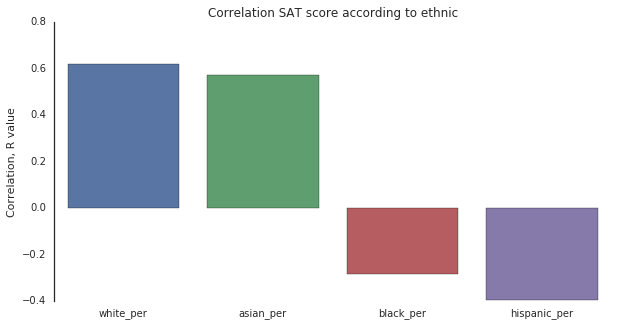

In [464]:
# Plotting the correlation between the race and the SAT_score
ethnic_corr = ethnic.corr()['sat_score'][:-1] #series
ethnic_corr = ethnic_corr.reset_index() #dF
ethnic_corr = ethnic_corr.rename({'index' : 'ethnic'}, axis = 1) #rename column

fig = plt.figure(figsize=(10,5))
sns.set_style("white")
sns.barplot(x = 'ethnic', y = 'sat_score', data = ethnic_corr)
sns.despine(top = True, right = True, bottom = True)
plt.title("Correlation SAT score according to ethnic")
plt.ylabel("Correlation, R value")
plt.xlabel("")

As we can see, there are a strong correlation between SAT_score and ethnic.
There are positive and negative correlation. 

- white and asian persons have a strong positive correlation, whereas black and hispanic persons have a negative correlation with the SAT score.

This show us, than the SAT score is related by the ethnic. This is not a suprise, in US there is a hugh disparity between the different ethnic. 

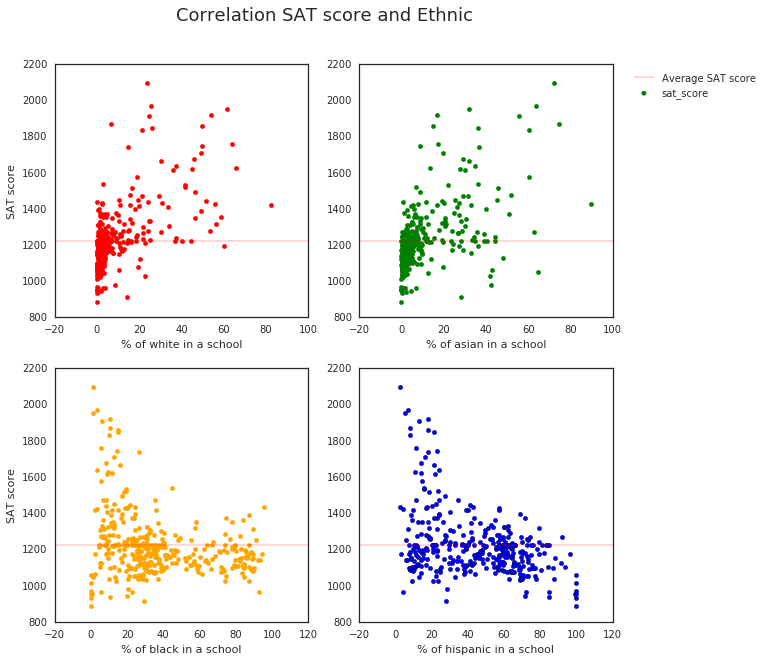

In [465]:
# scatter plot for ethnic and sat_score with the line of SAT average
fig = plt.figure(figsize =(10,10))
fig.suptitle("Correlation SAT score and Ethnic", fontsize = 18) 

for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax.set_axis_bgcolor("white")
    ax.axhline(combined["sat_score"].mean(), label='Average SAT score', color="red", linewidth=0.3) #plot the mean of SAT PLOT
    if i == 0:
        ax.scatter(x = combined["white_per"],y = combined["sat_score"], color="red")
        ax.set_xlabel("% of white in a school")
        ax.set_ylabel('SAT score')
    elif i == 1:
        ax.scatter(x = combined["asian_per"],y = combined["sat_score"], color="green")
        ax.set_xlabel("% of asian in a school")
        ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.8, 0.5))   
    elif i == 2:
        ax.scatter(x = combined["black_per"],y = combined["sat_score"], color="orange")
        ax.set_xlabel("% of black in a school")
        ax.set_ylabel('SAT score')
    else:
        ax.scatter(x = combined["hispanic_per"],y = combined["sat_score"])
        ax.set_xlabel("% of hispanic in a school")
  

We can valide what we see before, there are a positive correlation with white and asian person and a negative one for black and hispanic person. 

Further, more there is an higher percentage of black or hispanic in a school, fewer is the SAT score. For example, for a school where there are 100% of hispnaic, none of them have SAT score upper the average. 

On the contrary, more there are a percentage of white people in a school, higher is the SAT score. It is the same report for asian people. 

In [466]:
# Filter any school with the hispanic_per > 95%
high_hispanic_per = combined[(combined["hispanic_per"]>95)]['SCHOOL NAME']
print(high_hispanic_per)

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


PAN AMERICAN INTERNATIONAL HIGH SCHOOL there are 50% of paraguayan students and the other 50% are students from 26 differents countries

It is more or less the same for the other school. Indeed in INTERNATIONAL SCHOOL FOR LIBERAL ARTS says "their home language is Spanish".

In [467]:
# Filter school with a hispanic_per < 10 % and SAT score > 1800
less_hispanic_per= combined[(combined["hispanic_per"]<10) & (combined["sat_score"]> 1800)]["SCHOOL NAME"]
less_hispanic_per

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

STUYVESANT HIGH SCHOOL has a high selective recruitment (4 Nobel Prize)

BRONX HIGH SCHOOL OF SCIENCE has a high selective recruitment

BROOKLYN TECHNICAL HIGH SCHOOL has a high selective recruitment ...

All these schools have a high selective recruitment which explain the high sat score.


### 4.5 Investigate the correlations bewteen the gender and the SAT score in each district

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


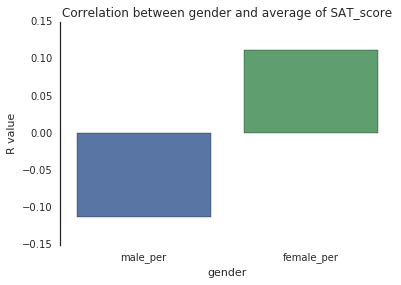

In [468]:
gender = combined[["male_per", "female_per","sat_score"]]
gender_corr = gender.corr()["sat_score"][0:-1].reset_index()
gender_corr = gender_corr.rename({'index':'gender'}, axis= 1)

#Correlation between gender and SAT score"
sns.set_style("white")
sns.barplot(x ='gender', y='sat_score', data = gender_corr)
sns.despine(right = True, bottom = True, top = True)
plt.title("Correlation between gender and average of SAT_score")
plt.ylabel("R value")

The r values is egal to abs(0,10), that means there is a low correlation, however one is positive (women) than the other is negative (men) 

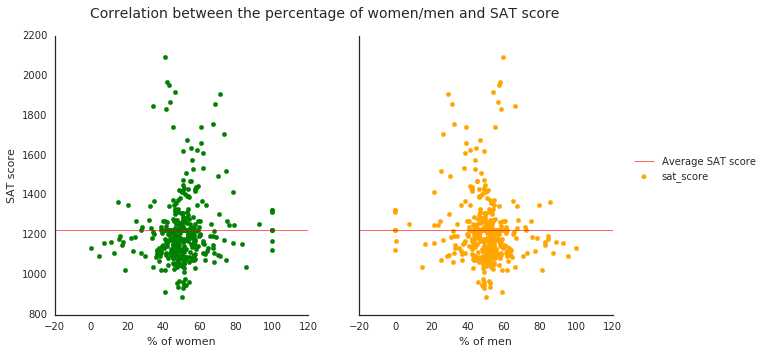

In [469]:
#Correlation between men and women
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5), sharey='row')
fig.suptitle('Correlation between the percentage of women/men and SAT score', fontsize = 14)
ax1.scatter(x=combined["female_per"],y=combined["sat_score"], color="green")
ax2.scatter(x=combined["male_per"],y=combined["sat_score"], color="orange")
ax1.axhline(combined["sat_score"].mean(), label='Average SAT score', color="red", linewidth=0.6) 
ax2.axhline(combined["sat_score"].mean(), label='Average SAT score', color="red", linewidth=0.6) 
ax1.set_xlabel('% of women')
ax2.set_xlabel('% of men')
ax1.set_ylabel('SAT score')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax1.set_axis_bgcolor("white")
ax2.set_axis_bgcolor("white")
ax2.legend(loc = 'best', bbox_to_anchor=(1.6,0.6))
plt.show()

Due to the mirror effect, we can say maybe there is an incoherence. 

In [470]:
#Filter school with a high percentage of women
high_score_female = combined[(combined["female_per"]>60) & (combined["sat_score"]>1700)]["SCHOOL NAME"]
high_score_female

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

From results we can say:
- Scools tend to be very selective for Arts/humanities with high academec standards

### 4.6 Investigate the Advanced Placement AP exams 
The number of students at school who took AP exams would highly correlated with the school's SAT scores.
Let's investigate deeper.

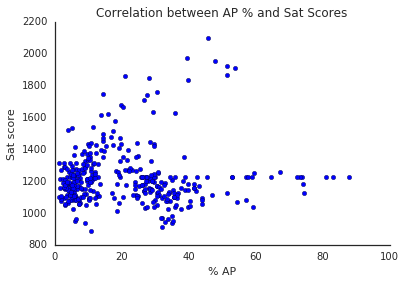

In [471]:
#Create a new columns
combined['ap_per'] = (combined["AP Test Takers "]/combined['total_enrollment'])*100
combined['ap_per']
#Relationship between ap_per vs sat_score
ax = plt.scatter(x = combined['ap_per'], y = combined['sat_score'] )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel("Sat score")
plt.xlabel("% AP")
plt.title("Correlation between AP % and Sat Scores")
plt.xlim(0,100)
plt.show()

As we can see, there is a correlation but not strong enough. We can draw two lines through this graph, one positive correlation and another one just an horizontal line. 

### 4.7 Correlation between class size and SAT score

We need the column AVERAGE CLASS SIZE

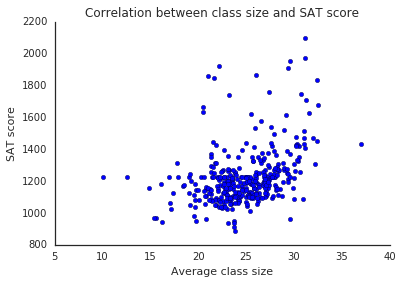

In [472]:
combined["AVERAGE CLASS SIZE"]
plt.scatter(x = combined["AVERAGE CLASS SIZE"], y = combined["sat_score"] )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Correlation between class size and SAT score")
plt.ylabel("SAT score")
plt.xlabel("Average class size")
plt.show()

This is a suprise, I was expecting there will be a negative correaltion and that the smaller class size had the bes score in SAT. However, the chart shows that there is actuall a correlation between large class sizes and better SAT scores. 

With a little research I found that lage class size produce better test results for example in USA, Japan, Germany, UK...

- More there are students more there are interaction between them and more there learn together, is encourages critical thinking and teach to another student help to memorize better 
- Large classes reduce the variety of activites that can be done in the class and results in activites that are centered on memorization, repitition and bookwork. Skills that may translate well with exam taking.

### 4.8 Which neighborhoods have the best schools

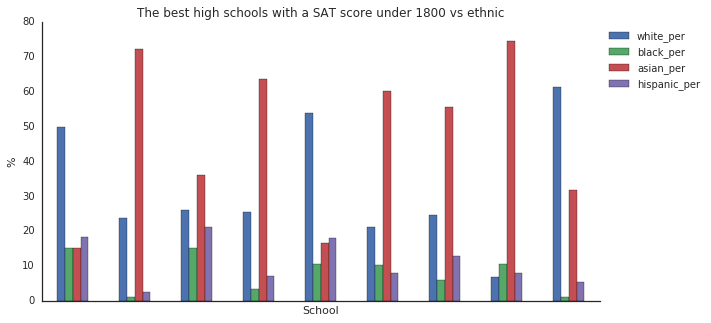

In [475]:
#Filter school with the highest SAT score
best = combined[combined["sat_score"] > 1800]
best_vs_etchnic = best[["SchoolName","boro", "white_per", "black_per", "asian_per", "hispanic_per"]]

best_vs_etchnic[["white_per", "black_per", "asian_per", "hispanic_per"]].plot(kind='bar', figsize=(10,5))
plt.legend(loc = 'best', bbox_to_anchor=(1,1))
plt.gca().get_xaxis().set_ticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel("%")
plt.xlabel("School")
plt.title("The best high schools with a SAT score under 1800 vs ethnic")
plt.show()

As we can see, the best high school considering the highest SAT score have a high percentage of asian or white students. 

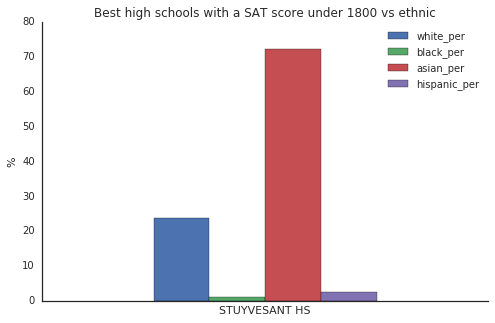

In [476]:
#The best school, with the highest SAT score is
best_school = combined[combined["sat_score"] == combined["sat_score"].max()].reset_index()
best_school[["SchoolName","boro","white_per", "black_per", "asian_per", "hispanic_per"]].plot(kind='bar', figsize=(8,5))
plt.title("Best high schools with a SAT score under 1800 vs ethnic")
plt.ylabel("%")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel(best_school["SchoolName"][0])
plt.gca().get_xaxis().set_ticks([])
plt.show()

# Conclusion

- Due to the economic and social issues in Americ, as unfair as it may be, schools that have a high ratio of Asian and White students are likely to perform best in SAT exams than Black and Hispanic students. 

- The best high school has more than 70% of asian students and it is located in Manhattan

- Schools with a higher proportion of females perform slightly better than majority male schools but the difference is small and gender is nowhere near as important to a schools SAT performance as ethnicicty.

- Schools with a hugher class sizes perfomed better in SAT exams that those with smaller class size. 